In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

%matplotlib inline

### Make some highly-correlated data

In [6]:
n_cols = 50
n_rows = 500

X = pd.DataFrame(data=np.zeros([n_rows, n_cols]), 
                 columns=[f'x{i + 1}' for i in range(n_cols)])

In [9]:
X.x1 = np.random.uniform(size=n_rows)
for c in range(2, n_cols + 1):
    intercept = np.random.uniform(-10, 10, size=1)
    slope = np.random.uniform(-3, 3, 1)
    noise = np.random.normal(
        scale=np.random.uniform(0.01, np.abs(slope), n_rows))
    c2 = np.random.choice(range(1, c))
    X[f'x{c}'] = intercept + slope * X[f'x{c2}'] + noise

In [10]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50
0,0.498150,7.995322,-8.084506,1.193192,-16.052569,-12.850630,-8.906681,24.320487,9.131277,27.396805,...,144.140239,-27.204149,66.796572,7.574792,-18.265514,-3.178408,-28.326073,271.771573,-171.780558,86.564700
1,0.389707,7.839102,-7.365819,5.842099,-15.727401,-12.447677,-8.799075,22.964336,8.810806,24.995855,...,155.884387,-23.441239,59.843816,8.088988,-17.601671,-2.888996,-27.043291,294.109192,-152.120807,92.616546
2,0.881396,7.978001,-8.516877,6.053530,-19.299097,-13.653037,-8.222818,29.839821,10.167610,25.226108,...,156.622903,-23.362794,63.583602,6.909536,-20.103726,-2.865445,-26.492066,295.872392,-160.953005,93.128204
3,0.601194,8.039551,-7.727249,4.073707,-16.306904,-11.953569,-7.497552,25.217810,9.257152,26.861025,...,139.000910,-21.598519,64.762490,7.061821,-16.661137,-3.622894,-22.942021,260.571527,-164.342918,83.231565
4,0.212129,7.922651,-7.505820,3.441812,-16.192666,-13.152638,-8.233122,24.684455,9.156379,25.306772,...,156.938495,-24.176378,57.518065,7.309614,-21.083776,-2.997152,-25.878315,296.326900,-148.340946,92.764471


In [11]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [12]:
# variance explained by each of the first 2 PCs
pca.explained_variance_ratio_ 

array([0.87785603, 0.0828833 ])

In [13]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

2

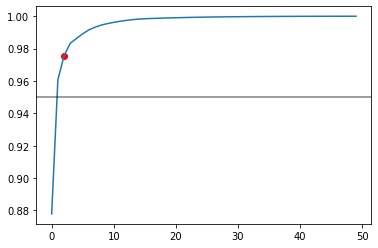

In [22]:
plt.plot(cumsum);
plt.axhline(0.95, c='k', alpha=0.5)
plt.scatter(d, cumsum[d], c='r');

In [29]:
pca = PCA(n_components=0.95)
X_red = pca.fit_transform(X)

In [30]:
X_red.shape

(500, 2)

In [33]:
X_recovered = pca.inverse_transform(X_red)
pd.DataFrame(X_recovered).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.406066,7.983343,-7.982702,3.983305,-17.316490,-12.638506,-8.788940,26.653654,9.579932,26.870582,...,145.157223,-23.601492,66.786612,7.989696,-17.910952,-3.542595,-27.846345,273.581410,-171.391392,86.456609
1,0.355371,7.971274,-7.759478,3.761208,-16.689321,-13.052082,-8.315139,25.334677,9.347763,25.193107,...,156.502042,-23.765773,59.239056,7.619157,-18.860980,-2.920239,-26.734696,295.461258,-151.655300,92.533356
2,0.409743,7.994625,-7.881680,3.903271,-17.025745,-13.131764,-8.549226,25.962007,9.446538,26.009189,...,157.983428,-23.767244,63.066015,7.805741,-19.025004,-3.236087,-27.277935,298.331522,-161.689387,93.325496
3,0.346595,7.954291,-7.888592,3.860361,-17.061974,-12.374791,-8.625385,26.233162,9.522588,26.309688,...,138.931326,-23.539932,64.040951,7.856757,-17.332382,-3.315785,-27.471170,261.555080,-164.173156,83.123698
4,0.339816,7.965326,-7.716273,3.713803,-16.569424,-13.066098,-8.228890,25.099824,9.308936,24.890485,...,157.038464,-23.777852,57.843991,7.550948,-18.897278,-2.805143,-26.533627,296.492957,-148.001527,92.820976


In [34]:
# us. faster if m or n > ~500
rnd_pca = PCA(n_components=25, svd_solver='randomized') 
X_red = rnd_pca.fit_transform(X)